# # INFOPILLAR  SOLUTION

# # Data Science Project

# # Task 4 -Customer Segmentation

# * Name - Narsale Vrushali Ambadas

# # Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# # Data Loading

In [2]:
df=pd.read_csv("/home/vrushali/Downloads/Customer -segmentation_dataset.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape

(200, 5)

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

# # Checking for Null Values

In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# # Droping Unwanted Column

In [7]:
df.drop(["CustomerID"], axis = 1, inplace=True)

In [8]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


# # Gender Distribution

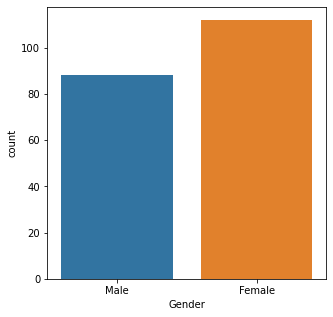

In [9]:
plt.figure(figsize = (5,5))
sns.countplot(data =df , x = 'Gender')
plt.show()

# # Age Distribution Bar Plot

In [10]:
age18_25 = df.Age[(df.Age>=18) & (df.Age<=25)]
age26_35 = df.Age[(df.Age>=26) & (df.Age<=35)]
age36_45 = df.Age[(df.Age>=36) & (df.Age<=45)]
age46_55 = df.Age[(df.Age>=46) & (df.Age<=55)]
age56andabove = df.Age[(df.Age>=56)]


x = ["18-25","26-35","36-45","46-55","55+"]
y = [len((age18_25).values), len((age26_35).values), len((age36_45).values), len((age46_55).values),
      len((age56andabove).values)]

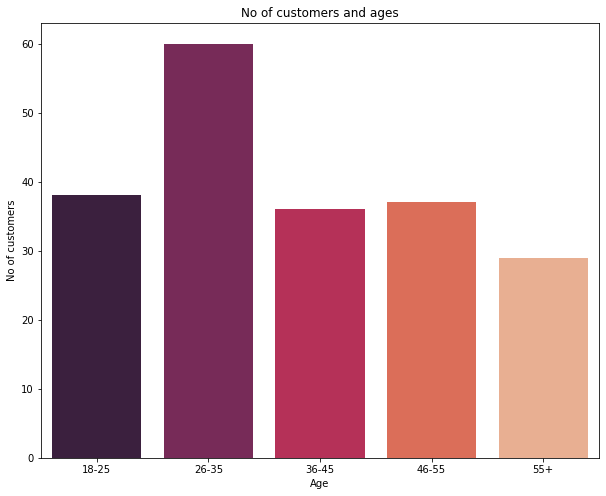

In [11]:
plt.figure(figsize=(10, 8))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("No of customers and ages")
plt.xlabel("Age")
plt.ylabel("No of customers")
plt.show()

# # Age Distribution Bar Plot

In [12]:
ai0_30= df["Annual Income (k$)"][(df["Annual Income (k$)"]>=0) & (df["Annual Income (k$)"]<=30)]
ai31_60 = df["Annual Income (k$)"][(df["Annual Income (k$)"]>=31) & (df["Annual Income (k$)"]<=60)]
ai61_90 = df["Annual Income (k$)"][(df["Annual Income (k$)"]>=61) & (df["Annual Income (k$)"]<=90)]
ai91_120 = df["Annual Income (k$)"][(df["Annual Income (k$)"]>=91) & (df["Annual Income (k$)"]<=120)]
ai121_150 = df["Annual Income (k$)"][(df["Annual Income (k$)"]>=121) & (df["Annual Income (k$)"]<=150)]


aix = ["$0-30000", "$26000-35000", "$36000-45000", "$46000-55000", "$55000+"]
aiy = [len((ai0_30).values), len((ai31_60).values), len((ai61_90).values), len((ai91_120).values),
       len((ai121_150).values)]

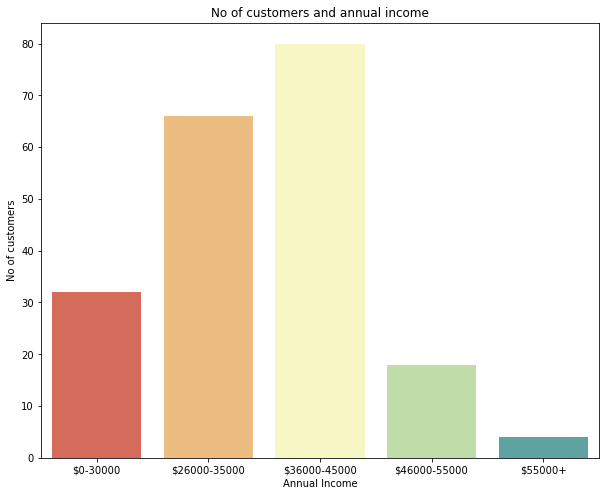

In [13]:
plt.figure(figsize=(10,8))
sns.barplot(x=aix, y=aiy, palette="Spectral")
plt.title("No of customers and annual income")
plt.xlabel("Annual Income")
plt.ylabel("No of customers")
plt.show()

In [14]:
ss1_20= df["Spending Score (1-100)"][(df["Spending Score (1-100)"]>=1) & (df["Spending Score (1-100)"]<=20)]
ss21_40= df["Spending Score (1-100)"][(df["Spending Score (1-100)"]>=21) & (df["Spending Score (1-100)"]<=40)]
ss41_60= df["Spending Score (1-100)"][(df["Spending Score (1-100)"]>=41) & (df["Spending Score (1-100)"]<=60)]
ss61_80= df["Spending Score (1-100)"][(df["Spending Score (1-100)"]>=61) & (df["Spending Score (1-100)"]<=80)]
ss81_100= df["Spending Score (1-100)"][(df["Spending Score (1-100)"]>=81) & (df["Spending Score (1-100)"]<=100)]

ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy = [len((ss1_20).values), len((ss21_40).values), len((ss41_60).values), len((ss61_80).values), 
       len((ss81_100).values)]

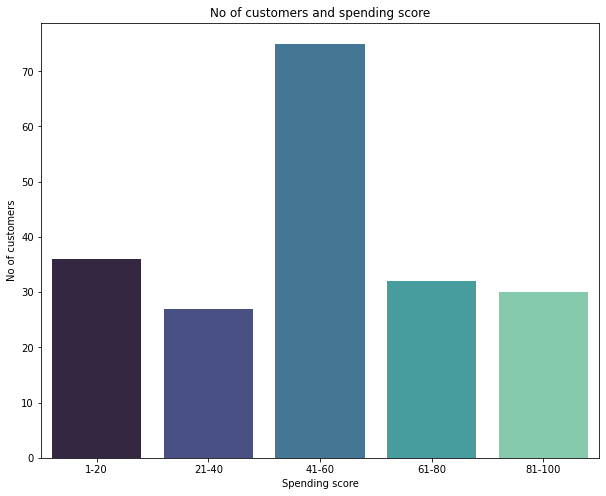

In [15]:
plt.figure(figsize=(10,8))
sns.barplot(x=ssx, y=ssy, palette="mako") 
plt.title("No of customers and spending score")
plt.xlabel("Spending score")
plt.ylabel("No of customers")
plt.show()

<AxesSubplot:>

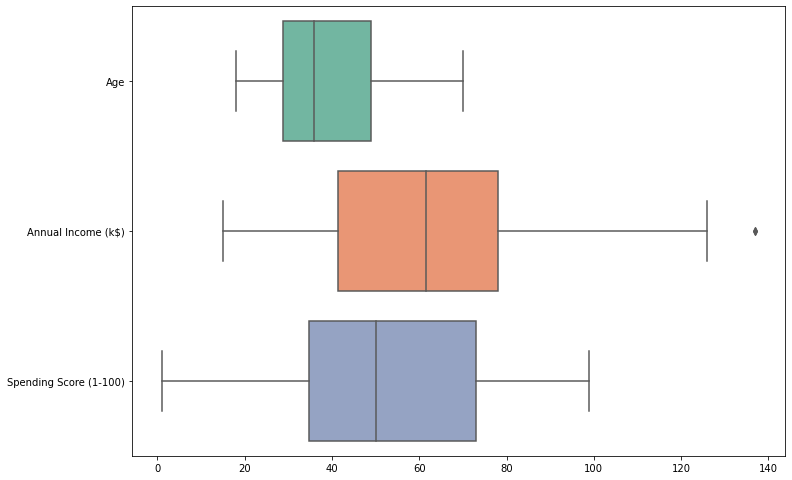

In [16]:
fig,ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.boxplot(data=df, orient="h", palette="Set2", ax=ax)



# # Elbow Curve

In [17]:
x1 = df.loc[:,["Annual Income (k$)","Spending Score (1-100)"]].values

In [18]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(x1)
    wcss.append(km.inertia_)

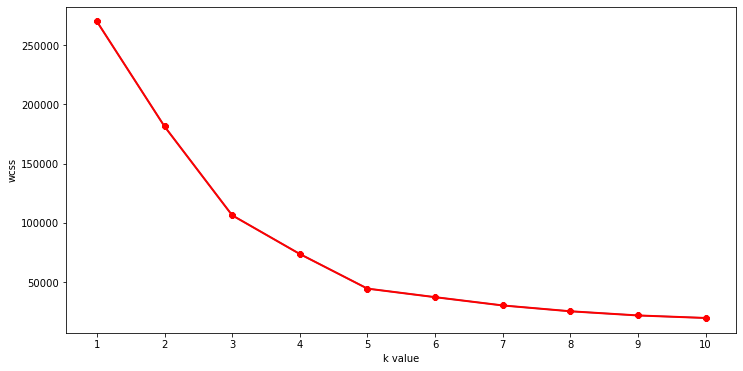

In [19]:
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker = "8")
plt.xlabel("k value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("wcss")
plt.show()

